# Code Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from naive_bayes_classifier import NaiveBayes

# Reading the Data

In [2]:
inflammation_data = pd.read_csv('./inflammation_diagnosis.csv', delimiter=';')

# Inspecting the Data

In [3]:
inflammation_data.head(5)

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [4]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    object 
 2   lumbar_pain         120 non-null    object 
 3   urine_pushing       120 non-null    object 
 4   micturition_pains   120 non-null    object 
 5   burning_of_urethra  120 non-null    object 
 6   inflammation        120 non-null    object 
 7   nephritis           120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


## Transforming Nominal Data to Booleans

In [5]:
inflammation_data = inflammation_data.replace(to_replace='no', value=False)
inflammation_data = inflammation_data.replace(to_replace='yes', value=True)

inflammation_data

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis
0,35.5,False,True,False,False,False,False,False
1,35.9,False,False,True,True,True,True,False
2,35.9,False,True,False,False,False,False,False
3,36.0,False,False,True,True,True,True,False
4,36.0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
115,41.4,False,True,True,False,True,False,True
116,41.5,False,False,False,False,False,False,False
117,41.5,True,True,False,True,False,False,True
118,41.5,False,True,True,False,True,False,True


Checking if the columns are indeed of type boolean

In [6]:
inflammation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         120 non-null    float64
 1   nausea              120 non-null    bool   
 2   lumbar_pain         120 non-null    bool   
 3   urine_pushing       120 non-null    bool   
 4   micturition_pains   120 non-null    bool   
 5   burning_of_urethra  120 non-null    bool   
 6   inflammation        120 non-null    bool   
 7   nephritis           120 non-null    bool   
dtypes: bool(7), float64(1)
memory usage: 1.9 KB


## Adding Disease Labels 
Add the disease values to a new label-column and check if the values make sense

In [7]:
inflammation_data['disease'] = [False if (inflammation_data['inflammation'][i] == False) & (inflammation_data['nephritis'][i] == False) else True for i in range(0,len(inflammation_data))]

# Plot the data

plot with seaborn, use different colors and sort the values by colors

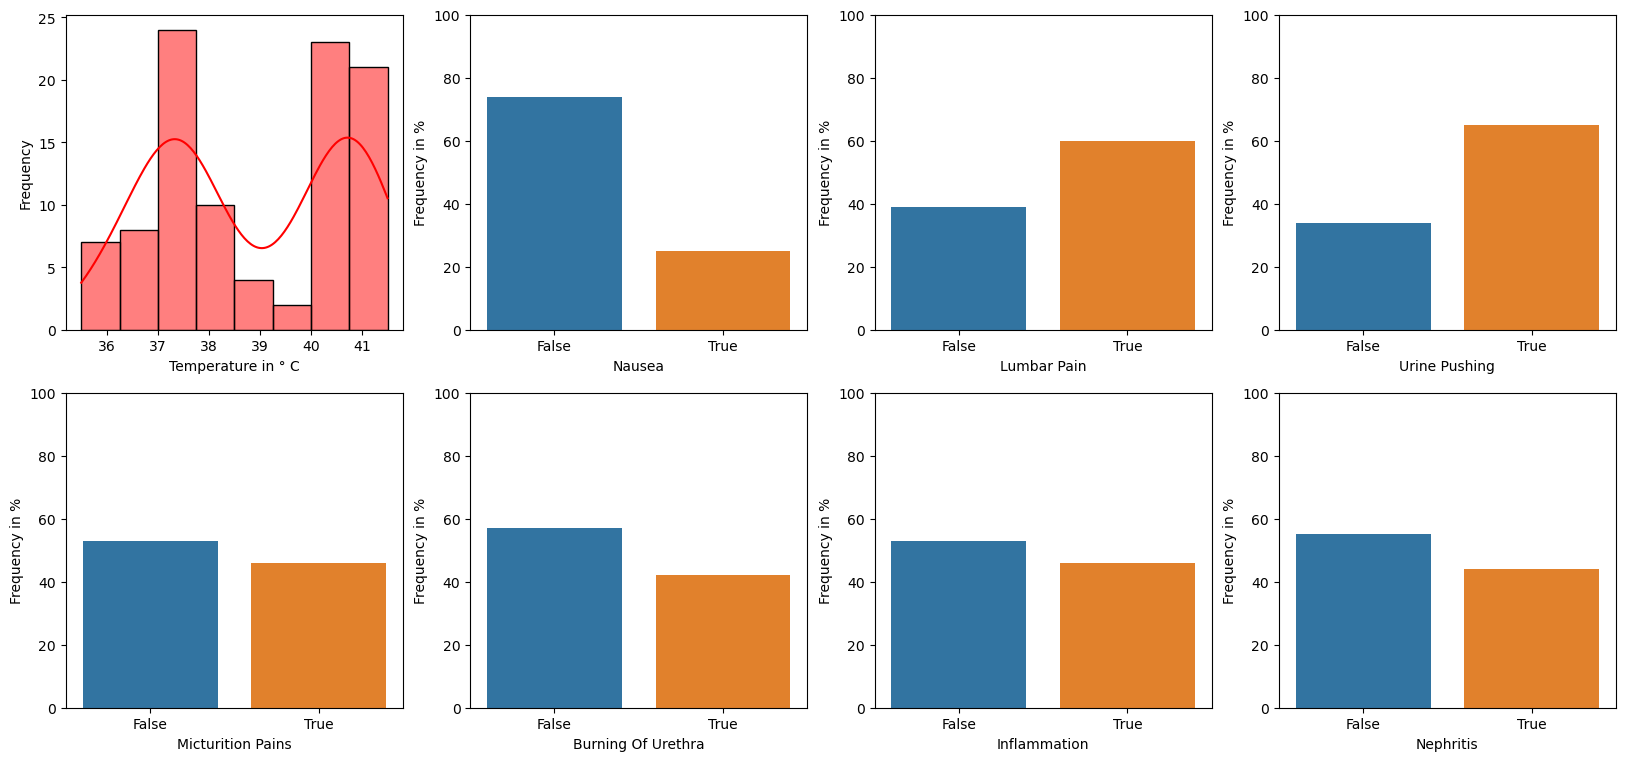

In [17]:
rows = 2
columns = 4
fig,ax = plt.subplots(nrows=rows, ncols=columns, figsize=(20,9))
[""]
index = 0 

for row in range(rows):
    for column in range(columns):
        nice_col_name = inflammation_data.columns.to_list()[index]
        nice_col_name = " ".join(word[0].upper() + word[1:] for word in nice_col_name.split("_"))
        
        
        if inflammation_data.columns[index] == 'temperature':
            s = sns.histplot(inflammation_data, ax=ax[row,column], x=inflammation_data.columns[column], kde=True, color='r')
            s.set(xlabel = 'Temperature in ° C', ylabel = "Frequency")
            
        else:
            b = sns.countplot(inflammation_data, x=inflammation_data.columns[index], ax=ax[row,column], order=[False, True])
            b.set(xlabel = nice_col_name, ylabel = 'Frequency in %')
            b.set_ylim(0,100)
            
        index += 1

# Creating Labels

# Splitting the Data
Count the values of 'disease' to see how the data is distributed

In [9]:
inflammation_data['disease'].value_counts(True)

disease
True     0.75
False    0.25
Name: proportion, dtype: float64

## Calculating Split Indices
The data split must account for the obvious imbalance in the data. Therefore, calculate the indices of the splits.

# Drop duplicates to avoid the same patients for training and test set

In [10]:
inflammation_data = inflammation_data.drop_duplicates()

In [11]:
train = pd.concat([inflammation_data[inflammation_data['disease'] == True].sample(frac =0.8), inflammation_data[inflammation_data['disease'] == False].sample(frac = 0.8)])
test = inflammation_data.drop(train.index)

In [12]:
set(list(test.index)).isdisjoint(list(train.index))

True

## Ensuring that the two dataframes do not share a column
The following merge shows duplicate rows across the two dataframes. If empty, there are no duplicates.

In [13]:
result = train.merge(right=test, how='inner', indicator=False)
result

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflammation,nephritis,disease


In [14]:
inflammation_data.groupby(["disease", inflammation_data["disease"]]).size()

disease  disease
False    False      25
True     True       74
dtype: int64

# TESTING

# positiv posterior soll grösser sein als negative posterior

evidence noch berechnen mit negative and ppositive posterior 

In [15]:
Y_test= test.iloc[:,-1].values
X_test = test.iloc[:,:-1].values

In [16]:
t = NaiveBayes()
p,f = t.fit(train, "disease")
print(p)
print("''''''''''''''")
print(f)

{False: {40.4: 0.1136258596377526, 38.0: 0.20227812424904942, 37.6: 0.19223020682799988, 35.9: 0.09686945250293805, 37.7: 0.19546289501708589, 36.2: 0.11552150719623444, 41.1: 0.07222205038598402, 37.5: 0.18855513225747686, 38.5: 0.20320993439738344, 40.7: 0.09505493234921489, 41.2: 0.06698724994873578, 40.6: 0.10114616331051463, 41.0: 0.0776617007636636, 37.0: 0.16459371823806693, 41.5: 0.05261573771130631, 40.8: 0.08909622815986437, 36.3: 0.12186351019909436, 37.9: 0.20050627516022748, 38.3: 0.20444113035037603, 37.1: 0.17001977609963537, 37.4: 0.1844652228769523, 36.6: 0.1408194697742509, 39.7: 0.1571795524496587, 40.0: 0.1389459006431181, 36.0: 0.10299577913314109, 40.3: 0.11995826989317956, 40.2: 0.12631142170780915, 37.2: 0.1751640757679476, 39.0: 0.19117293673851343, 37.3: 0.17999069846077528, 37.8: 0.19822865708300752, 36.9: 0.15892290346842197, 41.4: 0.05717617178352682, 36.7: 0.14699792864499628, 38.1: 0.20353039930845493, 40.5: 0.10734543707533592}, True: {40.4: 0.1645125693